In [23]:
import random
import numpy as np
import math 
import matplotlib.pyplot as plt 
from collections import defaultdict

This calculates the probability of landing on 25 in 24 or less flips of the coin

In [9]:
N=24

total_prob=0

#i is the number of 2's thrown and j is the number of 1's
for i in range (0,13):
    j=N-(i*2)
    permutations=math.factorial((i+j))/(math.factorial (i)*math.factorial(j))
    prob=((0.5)**(i+j))*permutations
    total_prob+=prob
    print('In', i+j, 'flips, the probability of landing on 25 is:', prob)
    
print('The total probability of landing on 25 is', total_prob)

In 24 flips, the probability of landing on 25 is: 5.960464477539063e-08
In 23 flips, the probability of landing on 25 is: 2.7418136596679688e-06
In 22 flips, the probability of landing on 25 is: 5.507469177246094e-05
In 21 flips, the probability of landing on 25 is: 0.0006341934204101562
In 20 flips, the probability of landing on 25 is: 0.004620552062988281
In 19 flips, the probability of landing on 25 is: 0.02217864990234375
In 18 flips, the probability of landing on 25 is: 0.0708160400390625
In 17 flips, the probability of landing on 25 is: 0.14837646484375
In 16 flips, the probability of landing on 25 is: 0.196380615234375
In 15 flips, the probability of landing on 25 is: 0.152740478515625
In 14 flips, the probability of landing on 25 is: 0.06109619140625
In 13 flips, the probability of landing on 25 is: 0.009521484375
In 12 flips, the probability of landing on 25 is: 0.000244140625
The total probability of landing on 25 is 0.6666666865348816


{3: 52, 5: 53, 2: 36, 4: 49, 6: 51, 8: 49, 7: 49, 10: 52, 12: 55, 9: 50, 11: 45, 14: 50, 15: 45, 17: 38, 16: 49, 13: 49, 19: 44, 21: 47, 18: 48, 20: 42, 23: 42, 22: 45, 24: 46, 25: 42, 27: 44, 28: 38, 26: 47, 29: 45, 31: 45, 33: 41, 34: 39, 30: 35, 32: 33, 35: 38, 36: 32, 37: 42, 38: 36, 40: 34, 42: 31, 39: 38, 41: 37, 43: 40, 44: 28, 46: 29, 45: 37, 47: 38, 49: 33, 51: 31, 53: 27, 55: 33, 48: 33, 50: 24, 52: 31, 54: 33, 56: 25, 58: 26, 59: 25, 61: 25, 57: 31, 60: 28, 63: 28, 65: 29, 62: 28, 64: 20, 66: 25, 68: 23, 69: 23, 71: 26, 72: 22, 67: 23, 73: 25, 75: 21, 70: 21, 77: 19, 78: 22, 80: 21, 82: 19, 83: 18, 74: 17, 76: 19, 79: 14, 81: 14, 84: 16, 85: 16, 86: 20, 87: 10, 88: 20, 89: 13, 91: 13, 90: 16, 92: 16, 94: 16, 96: 16, 98: 12, 99: 10, 93: 7, 97: 9, 95: 9, 101: 8, 103: 7, 100: 9, 102: 8, 104: 10, 105: 6, 106: 7, 107: 7, 108: 5, 109: 6, 110: 5, 112: 3, 113: 5, 114: 2, 115: 5, 116: 2, 117: 4, 111: 4, 118: 1}


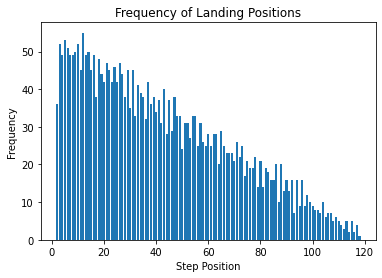

In [123]:
import random
import matplotlib.pyplot as plt

step_pos_count = {}  # Dictionary to store count of step_pos for each N

for N in range(0, 80):
    step_pos = 1
    for _ in range(N):
        flip = random.choice([1, 2])
        step_pos += flip

        # Store the count of step_pos for current N
        if step_pos in step_pos_count:
            step_pos_count[step_pos] += 1
        else:
            step_pos_count[step_pos] = 1
            
print(step_pos_count)
# Convert the dictionary into lists for plotting
positions = list(step_pos_count.keys())
counts = list(step_pos_count.values())

# Plotting
plt.bar(positions, counts)
plt.xlabel('Step Position')
plt.ylabel('Frequency')
plt.title('Frequency of Landing Positions')
plt.show()



We can see this clearly shows a positive skew, suggesting that we would expect a greater than uniform probability of landing on 25 

In [48]:
def generate_all_flip_sequences(N):
    if N == 0:
        return [[]]
    elif N == 1:
        return [[1], [2]]
    else:
        sequences = []
        for seq in generate_all_flip_sequences(N - 1):
            sequences.append(seq + [1])
            sequences.append(seq + [2])
        return sequences
    
def probability_pos_given_sequence(sequence, goal_position):
    position = 1
    for flip in sequence:
        position += flip
        if position == goal_position:
            return True
        if position < 1:  # Ensure position never goes below 1
            return False
    return False

def probability_pos_all_flips(N, goal_position):
    all_sequences = generate_all_flip_sequences(N)
    valid_sequences = list(filter(lambda seq: probability_pos_given_sequence(seq, goal_position), all_sequences))
    total_valid_sequences = len(valid_sequences)
    total_sequences = 2 ** N
    probability = total_valid_sequences / total_sequences
    return probability, total_valid_sequences, total_sequences, valid_sequences


# Example usage
N = 2
goal_position = 3
probability, total_valid_sequences, total_sequences, valid_sequences = probability_pos_all_flips(N, goal_position)
print(f"The probability of reaching position {goal_position} after {N} flips is approximately {probability:.4f}")
print(f"Total number of valid sequences: {total_valid_sequences}")
print(f"Total number of sequences: {total_sequences}")
print("Valid sequences:")
for seq in valid_sequences:
    print(seq)


The probability of reaching position 3 after 2 flips is approximately 0.7500
Total number of valid sequences: 3
Total number of sequences: 4
Valid sequences:
[1, 1]
[2, 1]
[2, 2]


This code could work for small N, but would take really long for larger values, it also doesn't count the different permutations

Now we want to find all the permutations of 1 and 2 which would mean we miss the 25

In [75]:
#This generates all the possible combinations of 1,2 which will mean we land om 25, given a previous number which we have landed on 


def generate_combinations(n):
    def generate_combinations_helper(target, partial):
        if target == 0:
            combinations.append(partial)
            return
        if target < 0:
            return

        # Include 1
        generate_combinations_helper(target - 1, partial + [1])

        # Include 2
        generate_combinations_helper(target - 2, partial + [2])

    combinations = []
    generate_combinations_helper(25 - n, [])
    return combinations

n = 2
result = generate_combinations(n)
#print("Possible combinations for n =", n, ":", result)
print("The number of valid sequences given we land on", n, "is:", len(result))

total=0
for combinations in result:
    prob=0.5**len(combinations)
    total+=prob
print('The probability of landing on 25, given we have landed on', n, 'is:', total)


The number of valid sequences given we land on 2 is: 46368
The probability of landing on 25, given we have landed on 2 is: 0.6666666269302368


And again we seem to get values which approximate to 2/3 

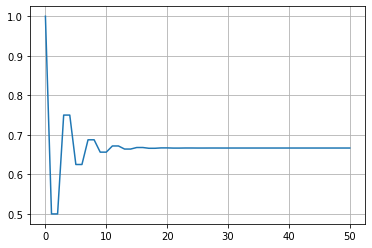

The probability of landing on a 25 is: 0.666748046875


In [127]:
# Plot recurrence relation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A = np.array([1, 0.5, 0.5])
for i in np.arange(2,50):
    a = 1-0.5*A[i-1]
    A = np.append(A,a)

plt.plot(A)
plt.grid('on')
plt.show()
n=25
print('The probability of landing on a', n, 'is:', A[n-1])

In [116]:
def generate_combinations(n):
    def generate_combinations_helper(target, partial):
        if target == 0:
            combinations.append(partial)
            return
        if target < 0:
            return

        # Include 1
        generate_combinations_helper(target - 1, partial + [1])

        # Include 2
        generate_combinations_helper(target - 2, partial + [2])

        # Include 3
        generate_combinations_helper(target - 3, partial + [3])

    combinations = []
    generate_combinations_helper(25 - n, [])
    return combinations

n = 1
result = generate_combinations(n)
#print("Possible combinations for n =", n, ":", result)
#print("The number of valid sequences given we land on", n, "is:", len(result))

total = 0
for combinations in result:
    prob = (1/3) ** len(combinations)
    total += prob
print('The probability of landing on 25, given we have landed on', n, 'is:', total)


The probability of landing on 25, given we have landed on 1 is: 0.49999944241474686


We can see here have a fair dice with 3 sides and options to move steps 1,2,3 the probability of landing on 25 decreases to approximately 0.5 we can test this by setting n=1 as we know with 100% we will land on 1. The generates all the possible sequences of 1,2,3 which will add to 24

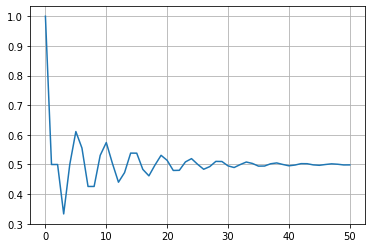

The probability of landing on a 25 is: 0.5197660699870728


In [128]:
# Plot recurrence relation for case where we have 1,2,3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A = np.array([1, 0.5, 0.5])
for i in np.arange(2,50):
    a = 1-(2/3)*A[i-1]-(1/3)*A[i-2]
    A = np.append(A,a)

plt.plot(A)
plt.grid('on')
plt.show()
n=25
print('The probability of landing on a', n, 'is:', A[n-1])

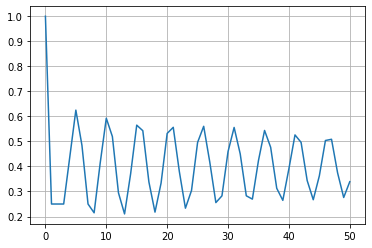

The probability of landing on a 25 is: 0.3040270209312439


In [130]:
# Plot recurrence relation for case where we have 1,2,3,4
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


A = np.array([1, 0.25, 0.25])
for i in np.arange(2,50):
    a = 1-(3/4)*A[i-1]-(2/4)*A[i-2]-(1/4)*A[i-3]
    A = np.append(A,a)

plt.plot(A)
plt.grid('on')
plt.show()
n=25
print('The probability of landing on a', n, 'is:', A[n-1])

{0: 1262, 2: 1336, 3: 1189, 1: 1285, 4: 1038, 5: 908, 6: 844, -1: 1096, -2: 981, -3: 857, -4: 687, -5: 559, -6: 456, -7: 354, -8: 292, 7: 795, 8: 686, 9: 589, 10: 501, 11: 437, 12: 415, -9: 271, -10: 241, -11: 191, -12: 149, 13: 356, 14: 274, 15: 209, 16: 137, 17: 100, 18: 105, -13: 113, -14: 103, -15: 70, -16: 51, 19: 96, 20: 80, 21: 70, 22: 59, 23: 60, 24: 71, -17: 59, -18: 44, -19: 30, -20: 32, -21: 27, -22: 18, -23: 12, 25: 63, 26: 53, 27: 47, 28: 36, 29: 19, 30: 11, 31: 11, 32: 8, 33: 7, 34: 7, 35: 3, 36: 2, 37: 1, -24: 11, -25: 12, -26: 10, -27: 4}


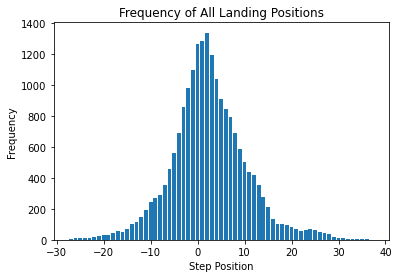

In [148]:
import random
import matplotlib.pyplot as plt

step_pos_count = {}  # Dictionary to store count of step_pos for each N

for N in range(0, 200):
    step_pos = 1
    for _ in range(N):
        flip = random.choice([-1, 1])
        step_pos += flip

        # Store the count of step_pos for current N
        if step_pos in step_pos_count:
            step_pos_count[step_pos] += 1
        else:
            step_pos_count[step_pos] = 1
            
print(step_pos_count)
# Convert the dictionary into lists for plotting
positions = list(step_pos_count.keys())
counts = list(step_pos_count.values())

# Plotting
plt.bar(positions, counts)
plt.xlabel('Step Position')
plt.ylabel('Frequency')
plt.title('Frequency of All Landing Positions')
plt.show()


{-7: 424, -13: 210, -1: 572, 7: 468, -9: 331, 9: 409, -5: 482, 11: 329, 5: 476, -15: 171, -23: 32, -3: 491, -31: 4, 25: 32, 1: 546, -11: 281, -21: 50, 17: 150, 15: 211, 19: 106, 23: 60, -19: 89, 13: 271, 3: 557, 21: 70, 27: 20, -17: 104, -25: 20, 31: 3, -29: 6, 29: 4, -27: 14, -45: 2, -33: 1, 33: 2, 35: 1, 37: 1}


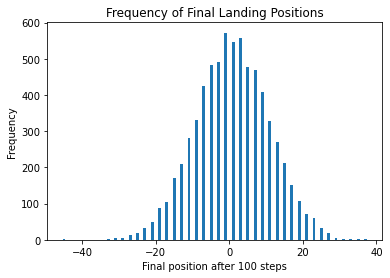

In [164]:
from scipy.optimize import curve_fit 
step_pos_count = {} 
for i in range(0,7000):
    step_pos=1
    for N in range(0, 100):
        flip = random.choice([-1, 1])
        step_pos += flip

            # Store the count of step_pos for current N
    if step_pos in step_pos_count:
        step_pos_count[step_pos] += 1
    else:
        step_pos_count[step_pos] = 1

print(step_pos_count)
# Convert the dictionary into lists for plotting
positions = list(step_pos_count.keys())
counts = list(step_pos_count.values())

# Plotting

plt.bar(positions, counts)
plt.xlabel('Final position after 100 steps')
plt.ylabel('Frequency')
plt.title('Frequency of Final Landing Positions')
plt.show()

/var/folders/x0/_vg42q852vlgq44lwsq1cdsh0000gn/T/ipykernel_60579/441554127.py:6: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*x**2)


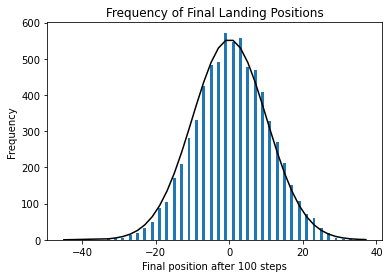

In [169]:
pos=np.asarray(positions)
cou=np.asarray(counts)

# Define the Gaussian function 
def Gauss(x, A, B): 
    y = A*np.exp(-1*B*x**2) 
    return y 
parameters, covariance = curve_fit(Gauss, pos, cou) 

# Sort the data based on the x-values
sorted_indices = np.argsort(pos)
pos_sorted = pos[sorted_indices]
cou_sorted = cou[sorted_indices]
  
fit_A = parameters[0] 
fit_B = parameters[1] 
  
fit_y = Gauss(pos_sorted, fit_A, fit_B) 
# Plotting
plt.bar(positions, counts)
plt.plot(pos_sorted, fit_y, '-', label='fit', color='black')
plt.xlabel('Final position after 100 steps')
plt.ylabel('Frequency')
plt.title('Frequency of Final Landing Positions')
plt.show()